In this example we will use linear regression to develop a calibration equation for a soil moisture sensor. The raw sensor output consists of a voltage differential that needs to be correlated with volumetric water content in order to make soil moisture estimations.

A laboratory calibration was conducted using containers with packed soil having a known soil moisture that we will use to develop the calibration curve. For each container and soil type we obtained voltage readings with the sensor and then we oven-dried to soil to find the true volumetric water content.

**Independent variable**: Sensor raw voltage readings (milliVolts)

**Dependent variable**: Volumetric water content ($cm^3/cm^3$)

In [1]:
# Import modules
import numpy as np
from numpy.polynomial import polynomial as P
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from scipy.optimize import curve_fit


In [2]:
# Read dataset
df = pd.read_csv('../datasets/teros_12_calibration.csv', skiprows=[0,2])
df.head(3)


,soil,vwc_obs,raw_voltage
0,loam,0.0047,1888
1,loam,0.1021,2019
2,loam,0.2538,2324


In [8]:
# Fit linear model (degree=1)
par = P.polyfit(df['raw_voltage'], df['vwc_obs'], deg=1)
print(par)

# Polynomial coefficients ordered from low to high.

[-7.94969978e-01  4.32559249e-04]


In [9]:
# Evaluate fitted linear model at measurement points
df['vwc_pred'] = P.polyval(df['raw_voltage'], par)


In [10]:
# Determine mean absolute error (MAE)

# Define auxiliary function for MAE
mae_fn = lambda x,y: np.round(np.mean(np.abs(x-y)),3)

# COmpute MAE for our observations
mae = mae_fn(df['vwc_obs'], df['vwc_pred'])
print('MAE:',mae)


MAE: 0.027


In [11]:
# Compute coefficient of determination (R^2)
r2 = r2_score(df['vwc_obs'], df['vwc_pred'])
print("R-squared:", np.round(r2, 2))


R-squared: 0.96


In [12]:
# Create range of voltages (independent variable) to create a line
n_points = 100
x_pred = np.linspace(df['raw_voltage'].min(), df['raw_voltage'].max(), n_points)

# Predict values of voluemtric water content (dependent variable) for line
y_pred = P.polyval(x_pred, par)


For a linear model we need at least two points and for non-linear models we need more than two. However, creating a few hundred or even a few thaousand values is not that expensive in terms of memory and processing time, so above we adopted a total of 100 points, so that you can adapt this example to non-linear models if necessary.


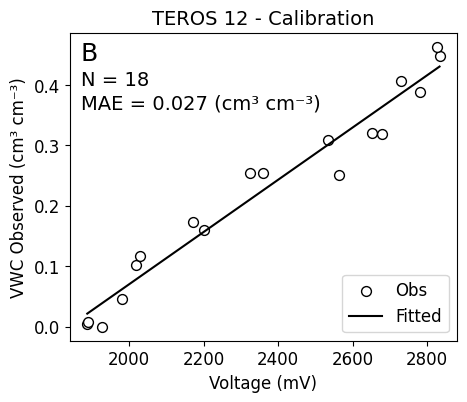

In [13]:
# Create figure
fontsize=12

plt.figure(figsize=(5,4))
plt.title('TEROS 12 - Calibration', size=14)
plt.scatter(df['raw_voltage'], df['vwc_obs'], facecolor='w', edgecolor='k', s=50, label='Obs')
plt.plot(x_pred, y_pred, color='black', label='Fitted')
plt.xlabel('Voltage (mV)', size=fontsize)
plt.ylabel('VWC Observed (cm³ cm⁻³)', size=fontsize)
plt.yticks(size=fontsize)
plt.xticks(size=fontsize)
plt.text(1870, 0.44, 'B',size=18)
plt.text(1870, 0.40,f'N = {df.shape[0]}', fontsize=14)
plt.text(1870, 0.36,f'MAE = {mae} (cm³ cm⁻³)', fontsize=14)
plt.legend(fontsize=fontsize, loc = 'lower right')
plt.show()